
**Analyze the performance of different piezoelectric materials based on their properties like voltage output, strain coefficients, etc and train a machine learning model to predict the performance based on material composition and structure.**


Ideas for upscaling:
*   Make a device or an app that goes with it that can detect the properties and predict the performance.



This data could be used to train a machine learning model to predict the piezoelectric properties of new materials. The model could learn from the patterns in the data and then make educated guesses about materials we haven't studied yet. This could help scientists discover new materials with useful piezoelectric properties for applications like sensors, actuators, and energy harvesting devices.

# Data Import

In [119]:
%pip install pymatgen ase

Note: you may need to restart the kernel to use updated packages.


In [120]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
from ase.visualize import view
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [122]:
import warnings

warnings.filterwarnings('ignore')

In [123]:
data = 'piezo.csv'

df = pd.read_csv(data)

In [124]:
df.shape

(941, 31)

* nsites could be renamed to num_sites for clarity.
* space_group and point_group are fine as-is.
* material_id is a good name.
* kpoint_density could be renamed to k_point_density or k_points_per_reciprocal_atom for better readability.
* poscar could be renamed to vasp_poscar to explicitly indicate it's the POSCAR file format used by VASP.
* structure could be renamed to cif_structure to clarify that it's the CIF representation of the crystal structure.

In [125]:
df.head()

,v_max/0,v_max/1,v_max/2,piezoelectric_tensor/0/0,piezoelectric_tensor/0/1,piezoelectric_tensor/0/2,piezoelectric_tensor/0/3,piezoelectric_tensor/0/4,piezoelectric_tensor/0/5,piezoelectric_tensor/1/0,...,meta/nsites,meta/space_group,meta/material_id,meta/point_group,meta/volume,meta/kpoint_density,meta/formula,meta/poscar,meta/structure,eij_max
0,1.0,1.0,1.0,0.0,0.0,0.0,-0.158420,0.0,0.0,0.0,...,2,216,mp-22925,-43m,73.219583,2000,AgI,Ag1 I1\r\n1.0\r\n4.066724 0.000000 2.347924\r\...,#generated using pymatgen\r\ndata_AgI\r\n_symm...,0.091464
1,1.0,1.0,1.0,0.0,0.0,0.0,0.008397,0.0,0.0,0.0,...,2,216,mp-406,-43m,72.827208,2000,CdTe,Cd1 Te1\r\n1.0\r\n4.059447 0.000000 2.343723\r...,#generated using pymatgen\r\ndata_CdTe\r\n_sym...,0.004848
2,1.0,1.0,1.0,0.0,0.0,0.0,0.896760,0.0,0.0,0.0,...,2,216,mp-1639,-43m,11.917209,2000,BN,B1 N1\r\n1.0\r\n2.220379 0.000000 1.281937\r\n...,#generated using pymatgen\r\ndata_BN\r\n_symme...,0.517745
3,1.0,1.0,1.0,0.0,0.0,0.0,0.053160,0.0,0.0,0.0,...,2,216,mp-10695,-43m,40.475675,2000,ZnS,Zn1 S1\r\n1.0\r\n3.337595 0.000000 1.926961\r\...,#generated using pymatgen\r\ndata_ZnS\r\n_symm...,0.030692
4,1.0,1.0,1.0,0.0,0.0,0.0,0.119310,0.0,0.0,0.0,...,2,216,mp-2176,-43m,59.145615,2000,ZnTe,Zn1 Te1\r\n1.0\r\n3.787417 0.000000 2.186666\r...,#generated using pymatgen\r\ndata_ZnTe\r\n_sym...,0.068884


# Feature Engineering

### Piezotensors
0, 1, 2
* 0 - x axis
* 1 - y axis
* 2 - z axis

0, 1, 2, 3, 4, 5
* 0 - Normal strain/stress along x
* 1 - Normal strain/stress along y
* 2 - Normal strain/stress along z
* 3 - Shear strain/stress in yz plane
* 5 - Shear strain/stress in xy plane




In [126]:
col_names = ['X_Vmax', 'Y_Vmax', 'Z_Vmax',
             'Piezoelectric Tensor 0.0', 'Piezoelectric Tensor 0.1',	'Piezoelectric Tensor 0.2', 'Piezoelectric Tensor 0.3',	'Piezoelectric Tensor 0.4', 'Piezoelectric_tensor 0.5',
             'Piezoelectric Tensor 1.0', 'Piezoelectric Tensor 1.1', 'Piezoelectric Tensor 1.2', 'Piezoelectric Tensor 1.3', 'Piezoelectric Tensor 1.4', 'Piezoelectric Tensor 1.5',
             'Piezoelectric Tensor 2.0', 'Piezoelectric Tensor 2.1', 'Piezoelectric Tensor 2.2', 'Piezoelectric Tensor 2.3', 'Piezoelectric Tensor 2.4', 'Piezoelectric Tensor 2.5',
             'Num Atoms',	'Space Goup',	'Material ID',	'Point Group',	'Volume',	'Kpoint density',	'Formula', 	'Poscar',	'Structure',	'eij_max']

df.columns = col_names

df.columns

Index(['X_Vmax', 'Y_Vmax', 'Z_Vmax', 'Piezoelectric Tensor 0.0',
       'Piezoelectric Tensor 0.1', 'Piezoelectric Tensor 0.2',
       'Piezoelectric Tensor 0.3', 'Piezoelectric Tensor 0.4',
       'Piezoelectric_tensor 0.5', 'Piezoelectric Tensor 1.0',
       'Piezoelectric Tensor 1.1', 'Piezoelectric Tensor 1.2',
       'Piezoelectric Tensor 1.3', 'Piezoelectric Tensor 1.4',
       'Piezoelectric Tensor 1.5', 'Piezoelectric Tensor 2.0',
       'Piezoelectric Tensor 2.1', 'Piezoelectric Tensor 2.2',
       'Piezoelectric Tensor 2.3', 'Piezoelectric Tensor 2.4',
       'Piezoelectric Tensor 2.5', 'Num Atoms', 'Space Goup', 'Material ID',
       'Point Group', 'Volume', 'Kpoint density', 'Formula', 'Poscar',
       'Structure', 'eij_max'],
      dtype='object')

In [127]:
row_names = df['Formula']

df.row = row_names
df.row

0              AgI
1             CdTe
2               BN
3              ZnS
4             ZnTe
          ...     
936         K4MoO8
937     Li5(CoO3)2
938    LiMn2(PO4)2
939    LiFe2(PO4)2
940     Li3MnSi2O7
Name: Formula, Length: 941, dtype: object

In [128]:
df.head()

,X_Vmax,Y_Vmax,Z_Vmax,Piezoelectric Tensor 0.0,Piezoelectric Tensor 0.1,Piezoelectric Tensor 0.2,Piezoelectric Tensor 0.3,Piezoelectric Tensor 0.4,Piezoelectric_tensor 0.5,Piezoelectric Tensor 1.0,...,Num Atoms,Space Goup,Material ID,Point Group,Volume,Kpoint density,Formula,Poscar,Structure,eij_max
0,1.0,1.0,1.0,0.0,0.0,0.0,-0.158420,0.0,0.0,0.0,...,2,216,mp-22925,-43m,73.219583,2000,AgI,Ag1 I1\r\n1.0\r\n4.066724 0.000000 2.347924\r\...,#generated using pymatgen\r\ndata_AgI\r\n_symm...,0.091464
1,1.0,1.0,1.0,0.0,0.0,0.0,0.008397,0.0,0.0,0.0,...,2,216,mp-406,-43m,72.827208,2000,CdTe,Cd1 Te1\r\n1.0\r\n4.059447 0.000000 2.343723\r...,#generated using pymatgen\r\ndata_CdTe\r\n_sym...,0.004848
2,1.0,1.0,1.0,0.0,0.0,0.0,0.896760,0.0,0.0,0.0,...,2,216,mp-1639,-43m,11.917209,2000,BN,B1 N1\r\n1.0\r\n2.220379 0.000000 1.281937\r\n...,#generated using pymatgen\r\ndata_BN\r\n_symme...,0.517745
3,1.0,1.0,1.0,0.0,0.0,0.0,0.053160,0.0,0.0,0.0,...,2,216,mp-10695,-43m,40.475675,2000,ZnS,Zn1 S1\r\n1.0\r\n3.337595 0.000000 1.926961\r\...,#generated using pymatgen\r\ndata_ZnS\r\n_symm...,0.030692
4,1.0,1.0,1.0,0.0,0.0,0.0,0.119310,0.0,0.0,0.0,...,2,216,mp-2176,-43m,59.145615,2000,ZnTe,Zn1 Te1\r\n1.0\r\n3.787417 0.000000 2.186666\r...,#generated using pymatgen\r\ndata_ZnTe\r\n_sym...,0.068884


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X_Vmax                    941 non-null    float64
 1   Y_Vmax                    941 non-null    float64
 2   Z_Vmax                    941 non-null    float64
 3   Piezoelectric Tensor 0.0  941 non-null    float64
 4   Piezoelectric Tensor 0.1  941 non-null    float64
 5   Piezoelectric Tensor 0.2  941 non-null    float64
 6   Piezoelectric Tensor 0.3  941 non-null    float64
 7   Piezoelectric Tensor 0.4  941 non-null    float64
 8   Piezoelectric_tensor 0.5  941 non-null    float64
 9   Piezoelectric Tensor 1.0  941 non-null    float64
 10  Piezoelectric Tensor 1.1  941 non-null    float64
 11  Piezoelectric Tensor 1.2  941 non-null    float64
 12  Piezoelectric Tensor 1.3  941 non-null    float64
 13  Piezoelectric Tensor 1.4  941 non-null    float64
 14  Piezoelect

In [130]:
df.isnull().sum()

X_Vmax                      0
Y_Vmax                      0
Z_Vmax                      0
Piezoelectric Tensor 0.0    0
Piezoelectric Tensor 0.1    0
Piezoelectric Tensor 0.2    0
Piezoelectric Tensor 0.3    0
Piezoelectric Tensor 0.4    0
Piezoelectric_tensor 0.5    0
Piezoelectric Tensor 1.0    0
Piezoelectric Tensor 1.1    0
Piezoelectric Tensor 1.2    0
Piezoelectric Tensor 1.3    0
Piezoelectric Tensor 1.4    0
Piezoelectric Tensor 1.5    0
Piezoelectric Tensor 2.0    0
Piezoelectric Tensor 2.1    0
Piezoelectric Tensor 2.2    0
Piezoelectric Tensor 2.3    0
Piezoelectric Tensor 2.4    0
Piezoelectric Tensor 2.5    0
Num Atoms                   0
Space Goup                  0
Material ID                 0
Point Group                 0
Volume                      0
Kpoint density              0
Formula                     0
Poscar                      0
Structure                   0
eij_max                     0
dtype: int64

In [131]:
pip install typing-extensions

Note: you may need to restart the kernel to use updated packages.


In [132]:
from pymatgen.core import Structure

In [133]:
def cif_to_grid(cif_string, grid_size=64):
    struct = Structure.from_str(cif_string, fmt='cif', primitive=True)
    atoms = struct.sites

    # Create a 3D grid
    grid = np.zeros((grid_size, grid_size, grid_size), dtype=np.float32)

    # Encode atomic information into the grid
    for atom in atoms:
        x, y, z = atom.frac_coords
        x = (x + 1e-6) % 1  # Apply a small offset to avoid boundary issues
        y = (y + 1e-6) % 1
        z = (z + 1e-6) % 1
        grid_x = int(x * (grid_size - 1))
        grid_y = int(y * (grid_size - 1))
        grid_z = int(z * (grid_size - 1))
        grid[grid_x, grid_y, grid_z] = atom.specie.Z  # Atomic number

    return grid

In [134]:
grids = []
for cif in df['Structure']:
    grid = cif_to_grid(cif)
    grids.append(grid)

In [135]:
grids = np.array(grids)

In [136]:
def augment_3d_grid(grid, rotate=True, flip=True):
    if rotate:
        # Random rotation along x, y, z axes
        rot_angles = np.random.uniform(0, 2 * np.pi, size=3)
        grid = np.rot90(grid, k=int(rot_angles[0] / (np.pi / 2)), axes=(1, 2))
        grid = np.rot90(grid, k=int(rot_angles[1] / (np.pi / 2)), axes=(0, 2))
        grid = np.rot90(grid, k=int(rot_angles[2] / (np.pi / 2)), axes=(0, 1))

    if flip:
        # Random flips along x, y, z axes
        flip_axes = np.random.randint(0, 2, size=3)
        grid = np.flip(grid, axis=0) if flip_axes[0] else grid
        grid = np.flip(grid, axis=1) if flip_axes[1] else grid
        grid = np.flip(grid, axis=2) if flip_axes[2] else grid

    return grid

In [137]:
df = df.drop('Structure', axis = 1)

In [138]:
df = df.drop('Poscar', axis = 1)

In [139]:
df = df.drop('Formula', axis = 1)

In [140]:
df = df.drop('Kpoint density',  axis = 1)

### Point group code:
1) -43m
2) 23
3) -42m
4) -4
5) -6m2
6) 4mm
7) 6mm
8) 3m
9) 32
10) 3
11) mm2
12) 222
13) m
14) 2
15) 1

In [141]:
df['Material ID'] = df['Material ID'].str.replace('mp-', '')
for group in df['Point Group']:
    if group == "-43m":
         df['Point Group'] = 1
    if group == "23":
         df['Point Group'] = 2
    if group == "-42":
         df['Point Group'] = 3
    if group == "-4":
         df['Point Group'] = 4
    if group == "-6m2":
         df['Point Group'] = 5
    if group == "4mm":
         df['Point Group'] = 6
    if group == "6mm":
         df['Point Group'] = 7
    if group == "3m":
         df['Point Group'] = 8
    if group == "32":
         df['Point Group'] = 9
    if group == "23":
         df['Point Group'] = 2
    if group == "3":
         df['Point Group'] = 10
    if group == "mm2":
         df['Point Group'] = 11
    if group == "222":
         df['Point Group'] = 12
    if group == "m":
         df['Point Group'] = 13
    if group == "2":
         df['Point Group'] = 14
    if group == "1":
         df['Point Group'] = 15
    

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X_Vmax                    941 non-null    float64
 1   Y_Vmax                    941 non-null    float64
 2   Z_Vmax                    941 non-null    float64
 3   Piezoelectric Tensor 0.0  941 non-null    float64
 4   Piezoelectric Tensor 0.1  941 non-null    float64
 5   Piezoelectric Tensor 0.2  941 non-null    float64
 6   Piezoelectric Tensor 0.3  941 non-null    float64
 7   Piezoelectric Tensor 0.4  941 non-null    float64
 8   Piezoelectric_tensor 0.5  941 non-null    float64
 9   Piezoelectric Tensor 1.0  941 non-null    float64
 10  Piezoelectric Tensor 1.1  941 non-null    float64
 11  Piezoelectric Tensor 1.2  941 non-null    float64
 12  Piezoelectric Tensor 1.3  941 non-null    float64
 13  Piezoelectric Tensor 1.4  941 non-null    float64
 14  Piezoelect

Normalize numerical features

numerical_features = ['Piezoelectric Tensor 0.0', 'Piezoelectric Tensor 0.1',	'Piezoelectric Tensor 0.2', 'Piezoelectric Tensor 0.3',	'Piezoelectric Tensor 0.4', 'Piezoelectric_tensor 0.5',
                      'Piezoelectric Tensor 1.0', 'Piezoelectric Tensor 1.1', 'Piezoelectric Tensor 1.2', 'Piezoelectric Tensor 1.3', 'Piezoelectric Tensor 1.4', 'Piezoelectric Tensor 1.5',
                      'Piezoelectric Tensor 2.0', 'Piezoelectric Tensor 2.1', 'Piezoelectric Tensor 2.2', 'Piezoelectric Tensor 2.3', 'Piezoelectric Tensor 2.4', 'Piezoelectric Tensor 2.5',
                      'Num Atoms',	'Space Goup',	'Volume',	'Kpoint density',	'eij_max']
for feature in numerical_features:
    # Calculate minimum and maximum values
    min_value = df[feature].min()
    max_value = df[feature].max()
    
    # Normalize the feature
    df[feature] = (df[feature] - min_value) / (max_value - min_value)
  ```

In [143]:
# grids = np.array(grids).reshape(len(grids), 64, 64, 64, 1)

In [144]:
X = df.drop(['Piezoelectric Tensor 0.0', 'Piezoelectric Tensor 0.1',	'Piezoelectric Tensor 0.2', 'Piezoelectric Tensor 0.3',	'Piezoelectric Tensor 0.4', 'Piezoelectric_tensor 0.5',
            'Piezoelectric Tensor 1.0', 'Piezoelectric Tensor 1.1', 'Piezoelectric Tensor 1.2', 'Piezoelectric Tensor 1.3', 'Piezoelectric Tensor 1.4', 'Piezoelectric Tensor 1.5',
            'Piezoelectric Tensor 2.0', 'Piezoelectric Tensor 2.1', 'Piezoelectric Tensor 2.2', 'Piezoelectric Tensor 2.3', 'Piezoelectric Tensor 2.4', 'Piezoelectric Tensor 2.5', 'eij_max'], axis = 1)
y = df[['Piezoelectric Tensor 0.0', 'Piezoelectric Tensor 0.1',	'Piezoelectric Tensor 0.2', 'Piezoelectric Tensor 0.3',	'Piezoelectric Tensor 0.4', 'Piezoelectric_tensor 0.5',
      'Piezoelectric Tensor 1.0', 'Piezoelectric Tensor 1.1', 'Piezoelectric Tensor 1.2', 'Piezoelectric Tensor 1.3', 'Piezoelectric Tensor 1.4', 'Piezoelectric Tensor 1.5',
      'Piezoelectric Tensor 2.0', 'Piezoelectric Tensor 2.1', 'Piezoelectric Tensor 2.2', 'Piezoelectric Tensor 2.3', 'Piezoelectric Tensor 2.4', 'Piezoelectric Tensor 2.5', 'eij_max']]

In [145]:
X = np.concatenate([X.values, grids.reshape(len(grids), -1)], axis=1)

In [146]:
X.shape

(941, 262152)

In [147]:
# X = np.concatenate([np.repeat(X[:, :, np.newaxis], grids.shape[1], axis=2), grids], axis=1)
X = X.reshape(X.shape[0], 8, 9, 11, 331)

In [148]:
X.shape

(941, 8, 9, 11, 331)

In [149]:
X = X.astype('float32')
y = y.astype('float32')

# Training

In [150]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [152]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (752, 8, 9, 11, 331)
x_test shape (189, 8, 9, 11, 331)
y_train shape (752, 19)
y_test shape (189, 19)


import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Convert X_train to a DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Identify non-numerical columns
non_numerical_cols = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), non_numerical_cols)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
Fit the model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [153]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [154]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv3D, MaxPool2D, Input
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

input_shape = (8, 9, 11, 331)
model = Sequential()
# model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), input_shape=(8, 9, 11, 331)))
model.add(Conv3D(filters = 11, kernel_size = (3, 3, 3),padding = 'Same', activation ='relu'))
model.add(Input(shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv3D(filters = 16, kernel_size = (3,3, 3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [155]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv3D, MaxPool3D, Input
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

input_shape = (8, 9, 11, 331)

model = Sequential()
model.add(Conv3D(filters=11, kernel_size=(3, 3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPool3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu'))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='linear'))  # Adjusted output layer to match the number of outputs in `y`

In [156]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [157]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [158]:
epochs = 10
batch_size = 250
validation_split = 0.2

In [162]:
# history = model.fit(X_train, y_train, epochs=10, batch_size=250, validation_split=0.2)
history = model.fit(X_train,y_train, batch_size=batch_size, epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 8281.6611 - mae: 49.5883 - val_loss: 320.0252 - val_mae: 10.0653
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14065.6016 - mae: 69.7336

2024-06-15 11:56:24.662698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 798ms/step - loss: 14065.6016 - mae: 69.7336 - val_loss: 275.7968 - val_mae: 9.2117
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - loss: 6084.0820 - mae: 41.7090 - val_loss: 211.3866 - val_mae: 8.0768
Epoch 4/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11646.3994 - mae: 84.3755

2024-06-15 11:56:39.198071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - loss: 11646.3994 - mae: 84.3755 - val_loss: 198.9824 - val_mae: 7.7544
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 4195.8647 - mae: 34.8343 - val_loss: 170.5325 - val_mae: 7.0897
Epoch 6/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4.1930 - mae: 1.3578

2024-06-15 11:56:52.982759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 757ms/step - loss: 4.1930 - mae: 1.3578 - val_loss: 159.1989 - val_mae: 6.8638
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 3177.1553 - mae: 30.2277 - val_loss: 137.8699 - val_mae: 6.5171
Epoch 8/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5119.6201 - mae: 58.0206

2024-06-15 11:57:06.721991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 889ms/step - loss: 5119.6201 - mae: 58.0206 - val_loss: 130.2511 - val_mae: 6.3783
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 2429.1982 - mae: 26.3422 - val_loss: 108.1787 - val_mae: 5.8639
Epoch 10/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2166.8022 - mae: 26.3671

2024-06-15 11:57:22.296159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step - loss: 2166.8022 - mae: 26.3671 - val_loss: 102.0779 - val_mae: 5.7063


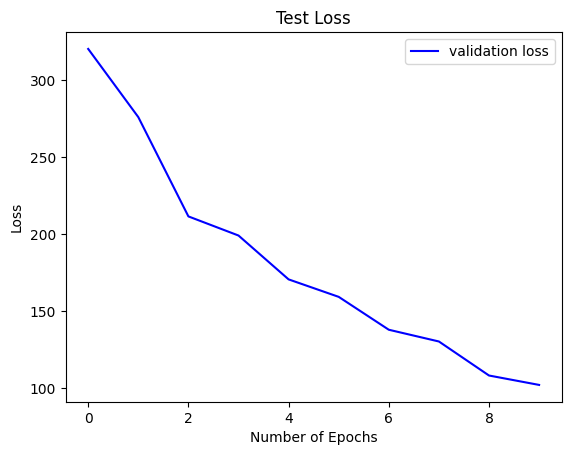

In [163]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step


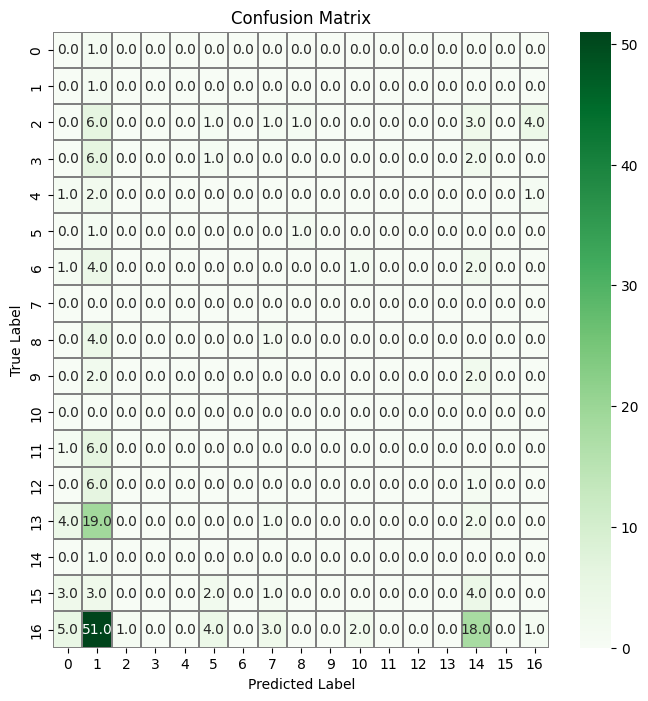

In [164]:
# confusion matrix
import seaborn as sns
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()